Day 4: Logistic Regression (Classification Refresher & Decision Boundaries)

Objective of the day
You already trained logistic regression on Titanic. Today you’ll:

Understand the sigmoid function (probability curve).

Visualize a decision boundary in 2D.

Compare linear vs logistic regression.

Linear regression is like drawing the best straight line through data to predict numbers.

Logistic regression uses almost the same math, but then applies a squashing function so the output is a probability, which makes sense for classification.

| Aspect   | Linear Regression             | Logistic Regression                 |
| -------- | ----------------------------- | ----------------------------------- |
| Target   | Continuous values             | Categorical (usually binary)        |
| Output   | Any number                    | Probability (0–1)                   |
| Function | Straight line (or hyperplane) | Sigmoid curve                       |
| Example  | Predict house price           | Predict if someone survived Titanic |


📝 Notes for Today

Logistic regression outputs a probability between 0–1 via the sigmoid.

The decision boundary is where probability = 0.5.

It’s linear in the input space, so it works well when classes are linearly separable, but struggles otherwise.

Train score: 1.0
Test score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



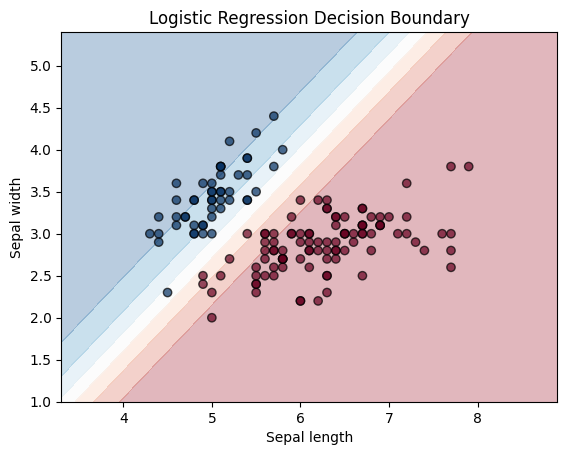

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data[:, :2]   # only first 2 features (sepal length & width)
y = (iris.target == 0).astype(int)  # classify "setosa" vs not

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

print("Train score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))
print(classification_report(y_test, model.predict(X_test)))

# Plot decision boundary

# Create a grid
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict probabilities
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap="RdBu")
plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k", cmap="RdBu", alpha=0.7)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Logistic Regression Decision Boundary")
plt.show()



📊 Exercise of the Day

What’s the accuracy on test data?

Look at the decision boundary plot — how does it separate setosa vs not setosa?

Plot the sigmoid curve:
👉 In plain words: why does this shape make sense for probabilities?

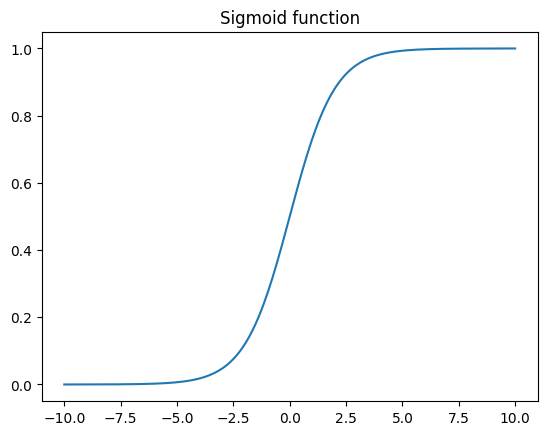

In [2]:
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 200)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)
plt.title("Sigmoid function")
plt.show()


1) 100%

2) With a line in the middle, it is right where the probability is 0.5.

3) It makes sense as it has only values between 0 and 1.

🌟 Mini-Challenge

Train logistic regression on two non-setosa classes (e.g., versicolor vs virginica).

Plot the decision boundary again.

Does it look “linear enough” or do you see misclassifications?

Train score: 0.7428571428571429
Test score: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.67      0.77      0.71        13

    accuracy                           0.73        30
   macro avg       0.73      0.74      0.73        30
weighted avg       0.74      0.73      0.73        30



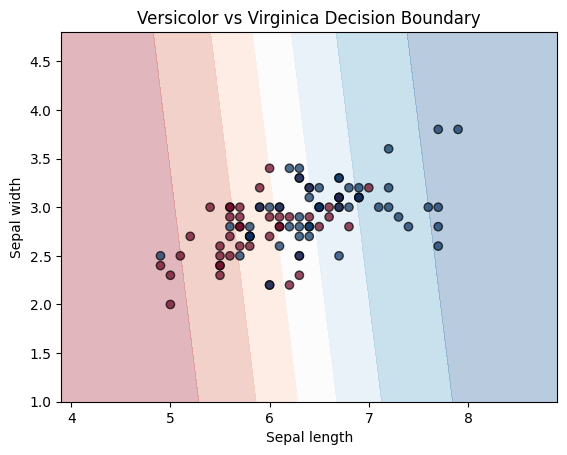

In [3]:
# Load dataset
iris = load_iris()

# Keep only versicolor (1) and virginica (2)
mask = (iris.target != 0)
X = iris.data[mask, :2]  # sepal length & width
y = iris.target[mask]

# Convert labels: virginica = 1, versicolor = 0
y = (y == 2).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

print("Train score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))
print(classification_report(y_test, model.predict(X_test)))

# Plot decision boundary
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="RdBu")
plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k", cmap="RdBu", alpha=0.7)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Versicolor vs Virginica Decision Boundary")
plt.show()


I see a lot of misclasification now. The decision boundary is not clear. Sepal length and sepal width are not appropiate features to classify versicolor vs virginia